# Exploring Flexible Recommendation System Approaches

This notebook explores flexible approaches for building recommendation systems that address the limitations of static user embeddings, such as the requirement for all users to be present during the training, validation, testing, and inference phases. The goal is to build a dynamic, scalable, and adaptable recommendation system.

---

## Approaches for Flexible Recommendation Systems

### **1. Content-Based Features to Derive Embeddings Dynamically**

This approach dynamically creates embeddings based on user or item metadata rather than relying on pre-trained static embeddings. These embeddings are inferred at runtime, making them inherently flexible.

#### **Key Components**
- **Input Features**:
  - User: Demographics, preferences, purchase history, browsing history.
  - Item: Description, categories, attributes, and tags.
- **Embedding Generation**:
  - Use neural networks (e.g., Feedforward NN, Transformers) to map input features to dense vector embeddings.
  - Content towers (one for users, one for items) process their respective features.
- **Scoring**:
  - Compute compatibility or relevance scores using similarity measures like dot products or cosine similarity.

#### **Advantages**
- **Cold Start**: Works for new users or items since embeddings are derived from their attributes.
- **Scalability**: No need to retrain the model to add new users/items.
- **Customizability**: Embeddings adapt to the richness of input features.

#### **Challenges**
- **Feature Engineering**: High dependency on quality and availability of user/item metadata.
- **Bias**: Over-reliance on certain features may lead to biased recommendations.

#### **Examples**
- Content-based filtering systems using TF-IDF, Word2Vec, or neural embeddings for articles, movies, or products.

---

### **2. Hybrid Models**

Hybrid models combine collaborative filtering (CF) with content-based filtering (CBF) to leverage the strengths of both approaches.

#### **Key Components**
- **Collaborative Filtering**:
  - Extract latent factors from interaction data (e.g., Matrix Factorization, Neural CF).
- **Content-Based Filtering**:
  - Dynamically generate embeddings from user/item metadata using neural networks or classical techniques.
- **Fusion Strategies**:
  - **Concatenation**: Combine CF embeddings with CBF embeddings before scoring.
  - **Gating Mechanisms**: Use attention or learned weights to balance CF and CBF contributions.
  - **Ensemble Models**: Independently train CF and CBF models and blend their predictions.

#### **Advantages**
- **Robustness**: Handles both sparse interactions and cold starts effectively.
- **Dynamic Adaptability**: Incorporates user preferences from metadata while leveraging collaborative signals.
- **Improved Accuracy**: Better generalization from combined strengths of CF and CBF.

#### **Challenges**
- **Complexity**: Higher computational and architectural complexity.
- **Data Imbalance**: Requires balancing CF and CBF contributions during training.

#### **Examples**
- Netflix's hybrid recommendation system that combines viewing history (CF) with metadata like genres, actors, and directors (CBF).
- Neural networks blending user-item embeddings with metadata embeddings.

---

### **3. Models Agnostic to User Count**

These models do not require a fixed set of users or items, making them ideal for dynamic environments with an evolving user base.

#### **Key Approaches**
- **Meta-Learning**:
  - Train a model to generalize across tasks (e.g., user-item interactions) so it can adapt quickly to new users/items.
  - Examples: MAML (Model-Agnostic Meta-Learning).
- **Few-Shot Learning**:
  - Learn embeddings for new users/items with limited data.
  - Examples: Prototypical Networks, Siamese Networks.
- **Generalized Factorization Machines**:
  - Extends factorization models to support additional context (e.g., time, location, device).
- **Graph Neural Networks (GNNs)**:
  - Represent user-item interactions as a graph and learn embeddings for nodes (users/items) dynamically.
  - Examples: PinSage, GraphSAGE, LightGCN.

#### **Advantages**
- **Dynamic User/Item Base**: No dependency on pre-trained static embeddings.
- **Cold Start**: Handles new users/items with few interactions.
- **Scalability**: Efficient for large datasets with evolving user/item sets.

#### **Challenges**
- **Data Sparsity**: Requires robust mechanisms to handle sparse interaction data.
- **High Complexity**: GNNs and meta-learning approaches can be computationally intensive.

#### **Examples**
- Pinterest’s PinSage for dynamic recommendations.
- GNN-based recommendation systems that dynamically generate node embeddings.

---

## Summary of Approaches

| **Aspect**                  | **Content-Based Features**          | **Hybrid Models**                     | **User-Count Agnostic Models**            |
|-----------------------------|-------------------------------------|---------------------------------------|-------------------------------------------|
| **Dynamic Embeddings**      | Yes                                | Yes                                   | Yes                                       |
| **Cold Start Handling**     | Strong                             | Moderate to Strong                   | Strong                                    |
| **Complexity**              | Low to Moderate                    | High                                  | High                                      |
| **Scalability**             | High                               | Moderate                              | High                                      |
| **Training Needs**          | Metadata and content only          | Interaction and metadata              | Interaction-focused with adaptability     |
| **Examples**                | TF-IDF, Word2Vec, Content Towers   | Neural CF + Metadata, Netflix Hybrid | Meta-Learning, GNNs, Few-Shot Learning    |

---


# Content-Based Features Approach for Recommendation Systems

This notebook explores the **Content-Based Features Approach** for building a recommendation system, focusing on dynamically deriving embeddings from user and item metadata. This approach addresses the limitations of static embeddings, such as the inability to handle new users or items without retraining.

---

## **Data Pipeline and Neural Network Architecture**

### **1. Data Pipeline Architecture**

| **Stage**                | **Content-Based Approach**                                                                                    | **Static Embedding Approach (StaticEmbeddingNCF)**                                           |
|---------------------------|----------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| **Input Data**            | - **User Metadata**: Features like age, location, interests, purchase history.                              | - **User IDs**: Numerical identifiers mapped to embeddings.                           |
|                           | - **Item Metadata**: Features like genre, description, attributes, tags.                                    | - **Item IDs**: Numerical identifiers mapped to embeddings.                           |
|                           | - **Interaction Data**: Ratings or implicit signals (clicks, purchases).                                    | - **Interaction Data**: Ratings or implicit signals (clicks, purchases).             |
| **Feature Engineering**   | - Normalize, encode, or embed metadata (e.g., one-hot encoding, embeddings for text).                       | - Precompute static embeddings for users and items.                                   |
|                           | - Optionally, use pre-trained embeddings for textual or categorical metadata (e.g., BERT, GloVe).           | - No direct dependency on feature engineering beyond interaction matrix setup.        |
| **Data Splitting**        | - Can include unseen users/items in test/validation sets (no fixed set of user IDs).                        | - Requires all user and item IDs to be present in train, val, test, and inference.    |
| **Data Loader Output**    | - Metadata tensors (user and item), and interaction labels (ratings).                                       | - User and item IDs, interaction labels (ratings).                                    |

---

### **2. Neural Network Architecture**

| **Component**           | **Content-Based Features**                                                                                | **Static Embedding Approach (EnhancedNCF)**                                           |
|--------------------------|----------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| **Embedding Generation** | - **User Content Tower**: A fully connected network maps user metadata to dense embeddings.              | - User embeddings are static, learned directly from ID mappings during training.      |
|                          | - **Item Content Tower**: A fully connected network maps item metadata to dense embeddings.              | - Item embeddings are static, learned directly from ID mappings during training.      |
|                          | - Input flexibility: Metadata embeddings can adapt dynamically for new users/items.                     | - Requires fixed embedding layers initialized for known user/item IDs.                |
| **Interaction Layer**    | - Combines dynamically generated user and item embeddings (e.g., concatenation, dot product).            | - Combines static user and item embeddings (e.g., concatenation, dot product).        |
| **Prediction Layer**     | - Fully connected layers predict interaction scores (ratings or clicks).                                | - Fully connected layers predict interaction scores.                                  |
| **Loss Function**        | - Regression loss (e.g., MSE for ratings) or classification loss (e.g., cross-entropy for implicit tasks).| - Similar loss functions; no difference in implementation.                            |

---

## **Architectural Comparison**

### **Data Flow**
- **Static Embedding (StaticEmbeddingNCF)**:
  - User and item embeddings are pre-trained for known IDs.
  - Embeddings cannot generalize to new users/items without retraining.
  - **Limitation**: Inflexible to dynamic changes in users or items.

- **Content-Based Features**:
  - User and item embeddings are computed dynamically based on their metadata.
  - System can generalize to new users/items if metadata is available.
  - **Advantage**: Flexible and handles cold starts effectively.

### **Embedding Adaptability**
- **Static Embedding**:
  - Fixed size and count for embeddings, directly tied to the number of users and items.
  - Scaling requires re-training or embedding extensions.

- **Content-Based Features**:
  - Embeddings derived from feature space, independent of dataset size.
  - No need for re-training when new users/items are introduced.

### **Cold Start Problem**
- **Static Embedding**:
  - Suffers in cold-start scenarios as new users/items lack pre-trained embeddings.

- **Content-Based Features**:
  - Resolves cold starts using metadata-derived embeddings for unseen users/items.

---

## **Data Preconditions for Content-Based Features**

1. **Metadata Availability**:
   - Sufficient and relevant metadata for users and items.
   - Examples:
     - **Users**: Age, gender, preferences, device type, location.
     - **Items**: Title, genre, description, price, category.

2. **Data Cleaning and Encoding**:
   - Normalize numerical features (e.g., Min-Max Scaling, Standardization).
   - Encode categorical features (e.g., one-hot, label encoding, or embeddings).
   - Preprocess text data (e.g., tokenization, embeddings like Word2Vec or BERT).

3. **Interaction Data**:
   - User-item interaction data (explicit ratings or implicit signals like clicks/purchases).
   - Train/test split should ensure no data leakage while including unseen users/items.

4. **Feature Balance**:
   - Ensure balanced contributions from user and item metadata to avoid overfitting on dominant feature sets.

---

## **Proposed Neural Network Architecture**

1. **Input Layers**:
   - User metadata features: $ \text{num\_user\_features} $
   - Item metadata features: $ \text{num\_item\_features} $

2. **Embedding Towers**:
   - User content tower:
     $$
     \text{User\_Embedding} = \text{FC}_{1}(\text{user\_features}) \rightarrow \text{ReLU} \rightarrow \ldots \rightarrow \text{FC}_{n}
     $$
   - Item content tower:
     $$
     \text{Item\_Embedding} = \text{FC}_{1}(\text{item\_features}) \rightarrow \text{ReLU} \rightarrow \ldots \rightarrow \text{FC}_{n}
     $$

3. **Interaction Layer**:
   - Combine user and item embeddings via concatenation or element-wise operations.
   - Example:
     $$
     \text{Combined} = [\text{User\_Embedding}, \text{Item\_Embedding}]
     $$

4. **Prediction Layer**:
   - Fully connected layers output the predicted score:
     $$
     \text{Output} = \text{FC}_{m}(\text{Combined})
     $$

5. **Loss**:
   - MSE (ratings prediction) or Cross-Entropy (implicit feedback).

---


## How Content-Based Features Replace User IDs in Recommendation Systems

In a **Content-Based Features Approach**, the architecture shifts focus from concrete user IDs (this was probably motivated from the factorization of R in P*Q) to abstract user profiles represented by metadata. This fundamentally changes how the model perceives and interacts with users, providing flexibility and generalizability.

---

### **Static Embedding Approach (User IDs)**

1. **User IDs as Input**:
   - User IDs are treated as discrete categorical values, mapped directly to static embedding vectors.
   - Example: User `123` maps to a specific embedding vector (e.g., `Embedding[123]`).

2. **Model Dependency**:
   - The model explicitly knows each user by ID.
   - To add a new user, a new embedding vector must be trained, requiring retraining of the embedding layer.

3. **Representation**:
   - The user representation is purely based on learned embeddings tied to their interactions.
   - **Problem**: This representation is non-generalizable and tightly coupled to the training data.

---

### **Content-Based Features Approach**

1. **User Metadata as Input**:
   - Users are represented by their **metadata** (e.g., age, gender, location, preferences, etc.).
   - No explicit user ID is required in the model's architecture.
   - Example: User metadata like `{"age": 25, "location": "NY", "interests": "action movies"}` is encoded into a feature vector.

2. **Model Generalization**:
   - The model does not "know" users as specific IDs.
   - Instead, it processes user metadata dynamically to generate embeddings during inference.
   - **Benefit**: New users with metadata can be represented without retraining.

3. **Representation**:
   - The user representation (embedding) is derived from their metadata features.
   - **Advantage**: This representation is generalizable and flexible for unseen users.

---

### **What Happens in the Architecture**

#### **Static Embedding Layers (Static IDs)**
- In the static approach, user IDs are fed into an embedding layer to look up a pre-trained vector:
  $$
  \text{User\_Embedding} = \text{Embedding}[User\_ID]
  $$
- This embedding is static and tied to specific user IDs.

#### **Content Towers (Metadata-Based)**
- In the content-based approach, user metadata is passed through a neural network to produce the embedding dynamically:
  $$
  \text{User\_Embedding} = \text{FC}_{1}(\text{Metadata}) \rightarrow \text{ReLU} \rightarrow \ldots \rightarrow \text{FC}_{n}
  $$
- The embedding is generated "on the fly" and is **independent of specific user IDs**.

---

### **Does the New Architecture "Know" Concrete Users?**

**No**, the new architecture does not explicitly "know" concrete users by their IDs. Instead:

- **What the Model Sees**:
  - A vectorized representation of the user's metadata.
  - This abstraction means the model processes users purely based on their characteristics, not their identities.

- **What the Model Learns**:
  - Patterns between metadata-derived embeddings and interaction outcomes (e.g., ratings, clicks).

- **Inference for New Users**:
  - For a new user with metadata, the model can derive a new embedding dynamically, even though it has never seen the user ID before.

---

### **Analogy**

Think of the static embedding approach as a school class where the teacher knows each student by their name (user ID). When a new student joins, the teacher cannot recognize or understand them without explicitly learning about them first.

In contrast, the content-based approach is like a teacher who knows about students based on their interests, skills, and behaviors (metadata). Even if a new student joins, the teacher can immediately understand them based on these characteristics, without needing to memorize their name.

---

### **Key Benefits of Removing User ID Dependency**

1. **Cold Start**:
   - New users can be served recommendations immediately if their metadata is available.

2. **Generalization**:
   - The model learns to recommend based on user characteristics rather than memorizing specific user interactions.

3. **Scalability**:
   - The system scales to millions of users without retraining embedding layers or worrying about embedding size limits.

4. **Flexibility**:
   - Users can dynamically change their preferences (metadata) and receive updated recommendations.

---

### **What About Items?**

This same principle applies to items. Instead of relying on static item IDs:
- Use **item metadata** (e.g., genres, tags, descriptions) to dynamically create embeddings.
- The model does not need to "know" specific items, allowing it to generalize to new items added to the catalog.

---


# Content-Based Features Approach: Training and Inference Workflow

## **1. Training Phase**

### **Inputs**
- **User Profiles**: Precomputed profiles based on enriched metadata (e.g., demographics, favorite genres).
- **Item Profiles**: Precomputed profiles derived from metadata (e.g., genres, plot summaries).
- **Ratings**: Interaction data linking users and items with a rating (or implicit feedback like clicks).

### **Process**
- The model learns a mapping from user and item profiles to interaction scores (ratings).
- Training data contains only users and items with known interactions.

### **Output**
- A trained model capable of predicting ratings for any user-item pair based on their profiles.

---

## **2. Inference Phase**

### **Goal**
To predict ratings (or relevance scores) for new or existing users and items, even if they were not seen during training.

### **How It Works**
1. **Existing Users and Items**:
   - The precomputed profiles are used directly.
   - The model predicts the rating for a given user-item pair.

2. **New Users (Cold Start)**:
   - Create a user profile on-the-fly using metadata (e.g., "age: 25, favorite genres: action, drama").
   - This profile is fed into the trained model alongside item profiles to generate predictions.

3. **New Items (Cold Start)**:
   - Create an item profile dynamically using metadata (e.g., "action, runtime: 90 minutes, overview: exciting thriller").
   - This profile is used with user profiles to generate predictions.

4. **New Users + New Items**:
   - Both profiles are created dynamically from metadata and used to predict ratings.

---

## **Advantages of this Approach**

1. **Cold-Start Resolution**:
   - New users and items are seamlessly integrated using their metadata, without needing interaction data.

2. **Scalability**:
   - Profiles can be generated dynamically, allowing the system to scale with minimal retraining.

3. **Flexibility**:
   - Metadata-rich environments benefit as the system learns to utilize features effectively.

---

## **Example Workflow**

### **Training**
- **Input**:
  - User Profile: `[age, num_reviews, avg_rating, embedding_favorite_genres, embedding_spending_category]`
  - Item Profile: `[budget, runtime, popularity, embedding_genres, embedding_overview]`
  - Rating: `4.5`
- **Model**:
  - Learns to map profiles to ratings.
- **Output**:
  - A trained model.

### **Inference**
- **Scenario 1: Existing User + Existing Item**:
  - Use stored profiles directly to predict the rating.
- **Scenario 2: New User**:
  - Example:
    - Metadata: `{"age": 30, "favorite_genres": "action, thriller"}`
    - Create a profile dynamically: `[30, embedding_favorite_genres]`
    - Predict ratings for items using this profile.
- **Scenario 3: New Item**:
  - Example:
    - Metadata: `{"genres": "sci-fi, adventure", "overview": "space exploration"}`
    - Create a profile dynamically: `[embedding_genres, embedding_overview]`
    - Predict ratings for users using this profile.

---

# Handling Users/Movies Without Ratings in the Content-Based Approach

## **1. Users/Movies Without Ratings in Training**

### **Assumptions**
- In **training**, only users and movies with interactions (ratings) are included. This is because:
  - The model learns the relationship between user and item profiles through interaction data.
  - Without interactions, there is no ground truth to train on.

### **Real-Life Handling**
- **Training Stage**:
  - **Users/Movies Without Ratings**:
    - These are not included in training since they lack interaction data.
    - However, their profiles are typically precomputed and stored, so they can be utilized later during inference.
  - **Cold Start in Training**:
    - For new users or items added over time, metadata (e.g., textual descriptions, genres) is used to dynamically create profiles, even if interactions are sparse.

---

## **2. Users/Movies Without Ratings During Inference**

### **Assumptions**
- In **inference**, the system must handle unseen users or movies (cold start).

### **How It Works**
- **Unseen Users**:
  - A new user's metadata is used to generate a dynamic profile (e.g., using demographic information, browsing history, or preferences).
  - This profile is fed into the model to compute recommendations, without requiring prior ratings.
- **Unseen Movies**:
  - A new movie's metadata (e.g., genres, descriptions, cast) is used to create its profile dynamically.
  - Recommendations are computed for the movie based on its profile, even if no interactions are available.

---

## **Practical Approaches to Cold Start**

1. **Content-Based Features**:
   - Dynamically derive embeddings for new users or items using metadata.
   - Example:
     - For a new user: Use their demographic or preference data (e.g., "age: 25, likes action movies").
     - For a new movie: Use its metadata (e.g., "action, runtime: 90 minutes, starring XYZ").
   - This ensures the system remains flexible and handles cold-start scenarios effectively.

2. **Pre-Trained Models**:
   - Use pre-trained embeddings (e.g., from text models like BERT or Sentence-BERT) for metadata fields.
   - This allows unseen entities to be represented consistently using their attributes.

3. **Hybrid Models**:
   - Combine content-based features with collaborative filtering during inference.
   - If sufficient interaction data becomes available for a user/movie, collaborative filtering signals augment recommendations.

---

## **Pipeline Summary for Real Life**

1. **Training**:
   - Train only on users and items with ratings (interaction data).
   - Ensure all available metadata is preprocessed for future use.

2. **Inference**:
   - Dynamically create profiles for new users and items using their metadata.
   - Leverage learned patterns to provide recommendations, even for cold-start entities.


# Building the data pipeline
The following code builds the data pipeline so that we have usable data loaders.

In [25]:
# Watch for changes
%load_ext autoreload
%autoreload 2

# Imports and configuration
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import os

# Paths and configurations
RATINGS_PATH = 'data/ml-latest-small/ratings.csv'
MOVIES_ENRICHED_PATH = 'data/ml-latest-small/movies_enriched.csv'
USER_ENRICHED_PATH = 'data/ml-latest-small/users_enriched.csv'
USER_EMBEDDINGS_PATH = 'data/ml-latest-small/user_profiles.npy'
MOVIE_EMBEDDINGS_PATH = 'data/ml-latest-small/movie_profiles.npy'
BATCH_SIZE = 128
MODEL_NAME = 'all-mpnet-base-v2'

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Sentence transformer model for text embeddings
text_model = SentenceTransformer(MODEL_NAME).to(device)

# Load data
ratings = pd.read_csv(RATINGS_PATH)
movies_enriched = pd.read_csv(MOVIES_ENRICHED_PATH)
users_enriched = pd.read_csv(USER_ENRICHED_PATH)

# Helper functions for encoding
def multi_hot_encode_genres(movies_df, all_genres):
    """
    Multi-hot encode genres.
    Args:
        movies_df (pd.DataFrame): DataFrame with a 'genres' column (pipe-separated).
        all_genres (list): List of all unique genres.
    Returns:
        np.ndarray: Multi-hot encoded genres.
    """
    genre_to_index = {genre: i for i, genre in enumerate(all_genres)}
    multi_hot = np.zeros((len(movies_df), len(all_genres)), dtype=int)

    for i, row in movies_df.iterrows():
        movie_genres = row['genres'].split('|')  # Assuming pipe-separated genres
        for genre in movie_genres:
            if genre in genre_to_index:
                multi_hot[i, genre_to_index[genre]] = 1

    return multi_hot

def one_hot_encode_sex(dataframe, column_name):
    """One-hot encode the 'sex' column (e.g., male, female, unknown)."""
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    return encoder.fit_transform(dataframe[[column_name]])

def scale_one_hot_to_max(one_hot_matrix, profiles):
    """
    Scale one-hot encoded features to match the maximum absolute value of the other features.
    Args:
        one_hot_matrix (np.ndarray): One-hot encoded features.
        profiles (np.ndarray): User or movie profiles (to determine max value of other features).
    Returns:
        np.ndarray: Scaled one-hot encoded features.
    """
    
    # Compute the maximum absolute value in the profiles
    max_abs_value = np.max(np.abs(profiles))
    print("DEBUG: Computed max absolute value in profiles:", max_abs_value)

    # Scale the one-hot encoded matrix
    scaled_one_hot = one_hot_matrix * max_abs_value

    return scaled_one_hot

def normalize_one_hot_features(one_hot_matrix, scale_factor=0.2):
    """Normalize one-hot encoded features to match the scale of other features."""
    return one_hot_matrix * scale_factor

def one_hot_encode_column(dataframe, column_name):
    """One-hot encode a categorical column."""
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    one_hot_encoded = encoder.fit_transform(dataframe[[column_name]])
    return one_hot_encoded

def encode_text(texts, model, batch_size=32):
    """Generate embeddings for a list of texts."""
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        batch_embeddings = model.encode(batch, batch_size=batch_size, device=device, show_progress_bar=False)
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

def normalize_numeric_column(dataframe, column_name):
    """Normalize a numeric column using Min-Max scaling."""
    scaler = MinMaxScaler()
    dataframe[column_name] = scaler.fit_transform(dataframe[[column_name]])
    return dataframe

def scale_multi_hot_to_embedding(multi_hot_matrix, embedding_matrix):
    """
    Scale multi-hot encoded features to match the absolute maximum value of an embedding matrix.
    Args:
        multi_hot_matrix (np.ndarray): Multi-hot encoded features (e.g., genres).
        embedding_matrix (np.ndarray): Embedding matrix (e.g., overview embeddings).
    Returns:
        np.ndarray: Scaled multi-hot encoded features.
    """
    # Compute the maximum absolute value in the embedding matrix
    max_abs_value = np.max(np.abs(embedding_matrix))

    # Scale the multi-hot encoded matrix
    scaled_multi_hot = multi_hot_matrix * max_abs_value

    return scaled_multi_hot

# Step 1: Restrict valid_user_ids and valid_movie_ids to those in ratings
valid_user_ids = set(ratings['userId'].unique()).intersection(set(users_enriched['userId'].unique()))
valid_movie_ids = set(ratings['movieId'].unique()).intersection(set(movies_enriched['movieId'].unique()))

print(f"Number of valid users: {len(valid_user_ids)}")
print(f"Number of valid movies: {len(valid_movie_ids)}")

# Filter ratings to include only valid userIds and movieIds
ratings = ratings[
    (ratings['userId'].isin(valid_user_ids)) &
    (ratings['movieId'].isin(valid_movie_ids))
]

# Create mappings from userId and movieId to indices
user_id_to_index = {user_id: idx for idx, user_id in enumerate(valid_user_ids)}
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(valid_movie_ids)}

# Add profile indices to the ratings dataframe
ratings['userIndex'] = ratings['userId'].map(user_id_to_index)
ratings['movieIndex'] = ratings['movieId'].map(movie_id_to_index)

# Step 2: Precompute User and Movie Profiles
def create_user_profiles(users_df):
    """Create user profiles using age, sex, and favorite_genres."""
    all_genres = sorted(set(','.join(users_enriched['favorite_genres'].dropna()).split(',')))
    print("All Genres:", all_genres)
        
    users_df['favorite_genres'] = users_df['favorite_genres'].fillna('')
    users_df['sex'] = users_df['sex'].fillna('Unknown')

    # Encode favorite genres using multi-hot encoding
    #user_genres_embeddings = encode_text(users_df['favorite_genres'].tolist(), text_model)
    movie_genres_encoded = multi_hot_encode_genres(movies_enriched, all_genres)

    # One-hot encode sex
    user_sex_one_hot = one_hot_encode_sex(users_df, 'sex')

    # Normalize numerical feature: age
    users_df = normalize_numeric_column(users_df, 'age')

    # Combine numerical features and embeddings (without one-hot yet)
    profiles_without_one_hot = []
    for i, row in users_df.iterrows():
        profile = np.concatenate((
            np.array([row['age']]),   # Numerical features
            movie_genres_encoded[i] # Favorite genres embedding
        ))
        profiles_without_one_hot.append(profile)

    # Convert profiles to a NumPy array for scaling
    profiles_without_one_hot = np.array(profiles_without_one_hot)

    # Dynamically scale the one-hot features
    user_sex_scaled = scale_one_hot_to_max(user_sex_one_hot, profiles_without_one_hot)

    # Append the scaled one-hot features to the profiles
    user_profiles = []
    for i in range(len(users_df)):
        profile = np.concatenate((
            profiles_without_one_hot[i],
            user_sex_scaled[i]
        ))
        user_profiles.append(profile)

    return np.array(user_profiles)

def create_movie_profiles(movies_df):
    """Create movie profiles by combining numerical, text, and multi-hot features."""
    
    all_genres = sorted(set('|'.join(movies_enriched['genres'].dropna()).split('|')))
    print("All Genres:", all_genres)

    # Multi-hot encode genres
    movie_genres_encoded = multi_hot_encode_genres(movies_df, all_genres)

    # Generate embeddings for overview
    movie_overview_embeddings = encode_text(movies_df['overview'].tolist(), text_model)

    # Scale multi-hot encoded genres to match the embedding max value
    scaled_movie_genres = scale_multi_hot_to_embedding(movie_genres_encoded, movie_overview_embeddings)

    # Normalize numerical features
    for col in ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']:
        if col in movies_df.columns:
            movies_df = normalize_numeric_column(movies_df, col)

    # Combine all features into profiles
    movie_profiles = []
    for i, row in movies_df.iterrows():
        profile = np.concatenate((
            np.array([row[col] for col in ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]),
            movie_overview_embeddings[i],
            scaled_movie_genres[i]
        ))
        movie_profiles.append(profile)

    return np.array(movie_profiles)

# Step 3: Check and create/load profiles
if os.path.exists(USER_EMBEDDINGS_PATH):
    print("Loading user profiles from disk...")
    user_profiles = np.load(USER_EMBEDDINGS_PATH)
else:
    print("Creating user profiles...")
    user_profiles = create_user_profiles(users_enriched[users_enriched['userId'].isin(valid_user_ids)].reset_index(drop=True))
    np.save(USER_EMBEDDINGS_PATH, user_profiles)
    print("User profiles saved to disk.")

if os.path.exists(MOVIE_EMBEDDINGS_PATH):
    print("Loading movie profiles from disk...")
    movie_profiles = np.load(MOVIE_EMBEDDINGS_PATH)
else:
    print("Creating movie profiles...")
    movie_profiles = create_movie_profiles(movies_enriched[movies_enriched['movieId'].isin(valid_movie_ids)].reset_index(drop=True))
    np.save(MOVIE_EMBEDDINGS_PATH, movie_profiles)
    print("Movie profiles saved to disk.")

# Step 4: Temporal split of ratings data
def temporal_split(ratings_df):
    """Split ratings data into train, validation, and test sets temporally."""
    ratings_df = ratings_df.sort_values('timestamp')
    train_end = int(0.7 * len(ratings_df))
    val_end = int(0.85 * len(ratings_df))
    train_data = ratings_df.iloc[:train_end]
    val_data = ratings_df.iloc[train_end:val_end]
    test_data = ratings_df.iloc[val_end:]
    return train_data, val_data, test_data

train_data, val_data, test_data = temporal_split(ratings)

# Step 5: Dataset Class
class ContentFeatureMovieLensDataset(Dataset):
    """Dataset for MovieLens providing user and movie profiles linked by ratings."""
    def __init__(self, ratings, user_profiles, movie_profiles):
        self.user_indices = ratings['userIndex'].values
        self.movie_indices = ratings['movieIndex'].values
        self.ratings = ratings['rating'].values
        self.user_profiles = user_profiles
        self.movie_profiles = movie_profiles

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        user_profile = self.user_profiles[self.user_indices[idx]]
        movie_profile = self.movie_profiles[self.movie_indices[idx]]
        rating = self.ratings[idx]
        return (
            torch.tensor(user_profile, dtype=torch.float32),
            torch.tensor(movie_profile, dtype=torch.float32),
            torch.tensor(rating, dtype=torch.float32)
        )

# Step 6: Create Dataloaders
train_dataset = ContentFeatureMovieLensDataset(train_data, user_profiles, movie_profiles)
val_dataset = ContentFeatureMovieLensDataset(val_data, user_profiles, movie_profiles)
test_dataset = ContentFeatureMovieLensDataset(test_data, user_profiles, movie_profiles)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

print("Data preparation complete!")
print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Number of valid users: 610
Number of valid movies: 9724
Loading user profiles from disk...
Creating movie profiles...
All Genres: ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
Movie profiles saved to disk.
Data preparation complete!
Train samples: 70585
Validation samples: 15125
Test samples: 15126


Let's inspect the data pipeline we just created:

In [26]:
# Validate user_profiles
num_unique_users = ratings['userId'].nunique()
assert user_profiles.shape[0] == num_unique_users, (
    f"Mismatch: user_profiles has {user_profiles.shape[0]} rows, "
    f"but ratings.csv has {num_unique_users} unique userId values."
)
print("Validation passed: user_profiles matches the number of unique users in ratings.csv.")

# Validate movie_profiles
num_unique_movies = ratings['movieId'].nunique()
assert movie_profiles.shape[0] == num_unique_movies, (
    f"Mismatch: movie_profiles has {movie_profiles.shape[0]} rows, "
    f"but ratings.csv has {num_unique_movies} unique movieId values."
)
print("Validation passed: movie_profiles matches the number of unique movies in ratings.csv.")


Validation passed: user_profiles matches the number of unique users in ratings.csv.
Validation passed: movie_profiles matches the number of unique movies in ratings.csv.


In [27]:
def find_max_value_profile(profiles, start_index):
    """
    Find the profile index with the maximum value over all embedding dimensions.
    Args:
        profiles (np.ndarray): Profiles array (user or movie profiles).
        start_index (int): Starting index for embedding dimensions (e.g., 1 or 4).
    Returns:
        dict: Information about the profile with the maximum value.
    """
    # Extract embedding dimensions
    embeddings = profiles[:, start_index:]

    # Find the maximum value and its location
    max_value = np.max(embeddings)
    profile_index = np.argmax(np.max(embeddings, axis=1))

    # Return details
    return {
        "profile_index": profile_index,
        "max_value": max_value,
        "profile_values": profiles[profile_index],
    }

# Find the user with the maximum age
print(find_max_value_profile(user_profiles, start_index=0))

{'profile_index': 0, 'max_value': 1.0, 'profile_values': array([0.44680851, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])}


Let's visualize data from the created loaders.

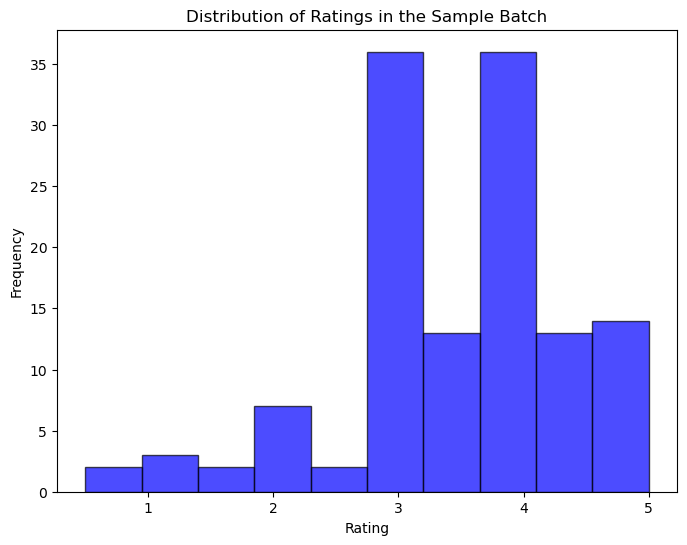

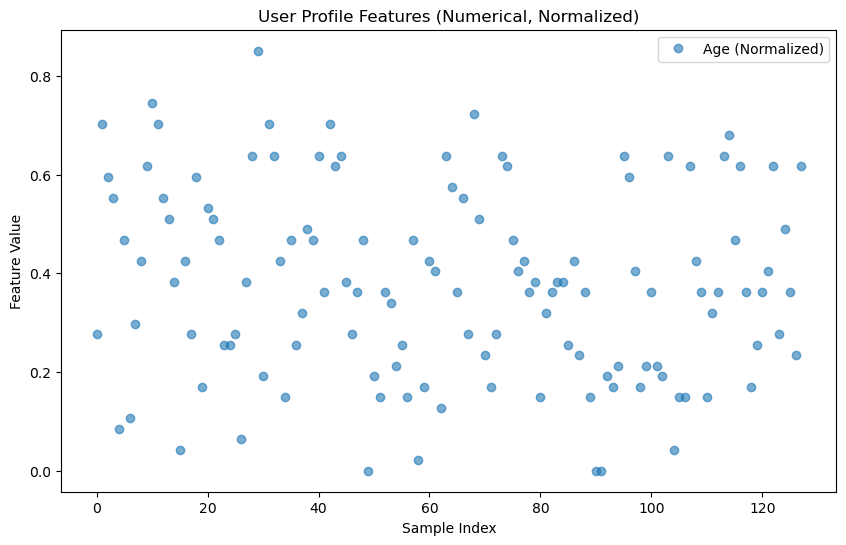

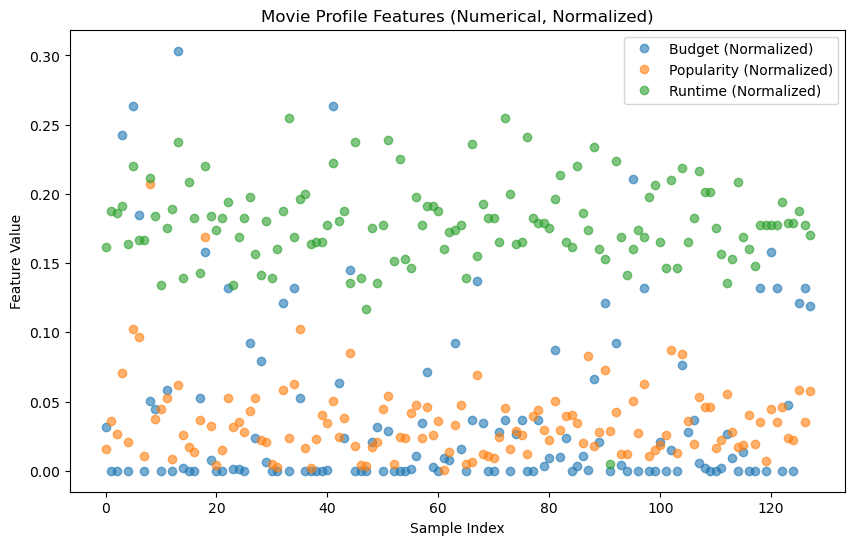

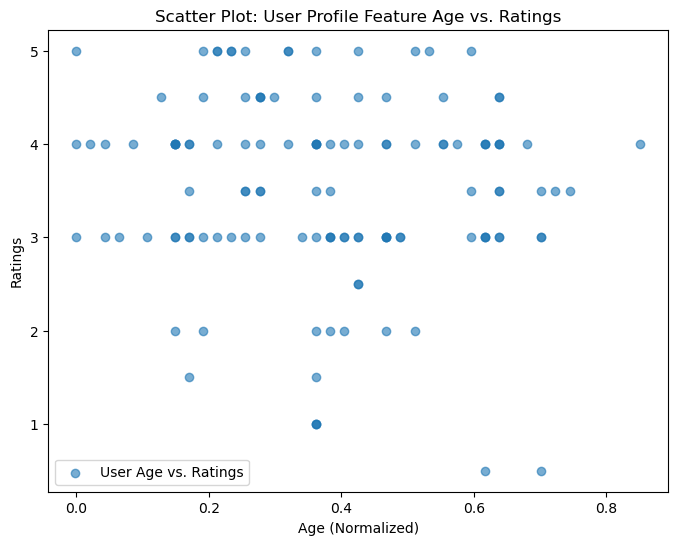

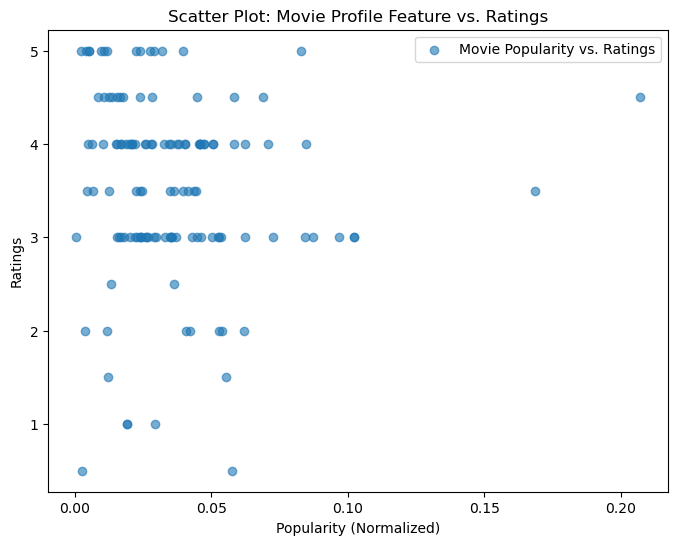

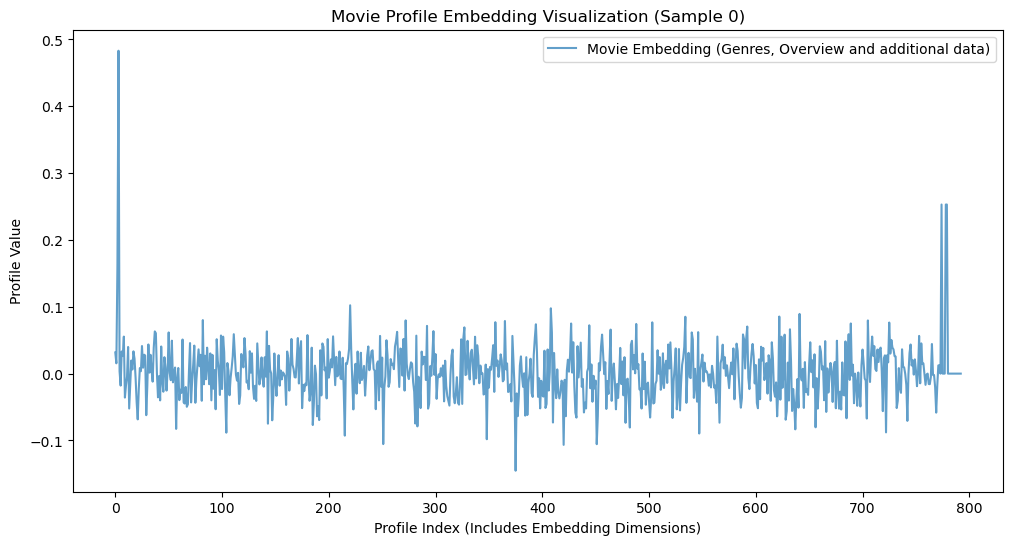

In [28]:
import matplotlib.pyplot as plt

# Helper function to fetch a batch of data from the DataLoader
def get_sample_batch(loader):
    """Fetch a single batch of data from a DataLoader."""
    for batch in loader:
        return batch  # Return the first batch

# Extract a sample batch from the train loader
sample_batch = get_sample_batch(train_loader)

# Unpack the batch: user profiles, movie profiles, and ratings
user_profiles, movie_profiles, ratings = sample_batch

# Convert tensors to numpy for visualization
user_profiles = user_profiles.numpy()
movie_profiles = movie_profiles.numpy()
ratings = ratings.numpy()

# 1. Visualize the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(ratings, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribution of Ratings in the Sample Batch")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 2. Visualize numerical features from user profiles (the only numerical feature: age)
plt.figure(figsize=(10, 6))
plt.plot(user_profiles[:, 0], 'o', label='Age (Normalized)', alpha=0.6)
plt.title("User Profile Features (Numerical, Normalized)")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.legend()
plt.show()

# 3. Visualize numerical features from movie profiles (first 3 numerical features)
plt.figure(figsize=(10, 6))
plt.plot(movie_profiles[:, 0], 'o', label='Budget (Normalized)', alpha=0.6)
plt.plot(movie_profiles[:, 1], 'o', label='Popularity (Normalized)', alpha=0.6)
plt.plot(movie_profiles[:, 2], 'o', label='Runtime (Normalized)', alpha=0.6)
plt.title("Movie Profile Features (Numerical, Normalized)")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.legend()
plt.show()

# 4. Visualize the relationship between a user profile feature and ratings
plt.figure(figsize=(8, 6))
plt.scatter(user_profiles[:, 0], ratings, alpha=0.6, label="User Age vs. Ratings")
plt.title("Scatter Plot: User Profile Feature Age vs. Ratings")
plt.xlabel("Age (Normalized)")
plt.ylabel("Ratings")
plt.legend()
plt.show()

# 5. Visualize the relationship between a movie profile feature and ratings
plt.figure(figsize=(8, 6))
plt.scatter(movie_profiles[:, 1], ratings, alpha=0.6, label="Movie Popularity vs. Ratings")
plt.title("Scatter Plot: Movie Profile Feature vs. Ratings")
plt.xlabel("Popularity (Normalized)")
plt.ylabel("Ratings")
plt.legend()
plt.show()

# Inspect embeddings for a random movie profile
plt.figure(figsize=(12, 6))
plt.plot(movie_profiles[0, 0:], label="Movie Embedding (Genres, Overview and additional data)", alpha=0.7)
plt.title("Movie Profile Embedding Visualization (Sample 0)")
plt.xlabel("Profile Index (Includes Embedding Dimensions)")
plt.ylabel("Profile Value")
plt.legend()
plt.show()

You may wonder why the Profile Index (Includes Embedding Dimensions) are larger than the embedding dimension of a single SBERT encoded text. This is because the final embedding vector contains multiple embeddings, the numerical embeddings as textual embeddings too.

**User Profile**
Numerical Features:

Age, genres, sex = 1(age) + number(genres) + 1(sex) dimensions.

Total Dimensions:
1(Numerical) + 18(Genres one-hot) + 1(Categorial) = 20 dimensions.


**Movie Profile**
Numerical Features:

Budget, popularity, runtime, vote_average, vote_count = 5 dimensions.

Genres = 18

***Embeddings***:
Overview embedding = 768 dimensions.

5 (Numerical) + 18 (Genres) + 768 (Overview) = 791 dimensions.

Let us inspect some rows of the loaders:

In [23]:
# Fetch a single batch of data from the train loader
sample_batch = next(iter(train_loader))

# Unpack the batch: user profiles, movie profiles, and ratings
user_profiles, movie_profiles, ratings = sample_batch

# Convert tensors to numpy arrays for inspection
user_profiles = user_profiles.numpy()
movie_profiles = movie_profiles.numpy()
ratings = ratings.numpy()

# Print 5 rows of user profiles
print("Sample User Profiles (5 rows):")
for i in range(5):
    print(f"User {i + 1} Profile: {user_profiles[i]}")

# Print 5 rows of movie profiles
print("\nSample Movie Profiles (5 rows):")
for i in range(5):
    print(f"Movie {i + 1} Profile: {movie_profiles[i]}")

# Print 5 ratings corresponding to the above profiles
print("\nSample Ratings (5 values):")
for i in range(5):
    print(f"Rating {i + 1}: {ratings[i]}")


Sample User Profiles (5 rows):
User 1 Profile: [0.10638298 0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 1.         0.         0.         0.         0.         0.
 0.         1.         0.        ]
User 2 Profile: [0.42553192 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 1.         0.         0.         0.         0.         0.
 0.         1.         0.        ]
User 3 Profile: [0.06382979 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 1.         0.         0.         0.         0.         0.
 0.         1.         0.        ]
User 4 Profile: [0.5744681 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        1.        0.
 0.        0.        0.        0.        0.        0.        1.       ]
User 5 Profile: [0.5531915 0.        0.        0.        0.        0.

In [10]:
# Fetch a single batch of data from the train loader
sample_batch = next(iter(train_loader))

# Unpack the batch: user profiles, movie profiles, and ratings
user_profiles, movie_profiles, ratings = sample_batch

# Convert tensors to numpy arrays for inspection
user_profiles = user_profiles.numpy()
movie_profiles = movie_profiles.numpy()
ratings = ratings.numpy()

# Verify alignment
print("Verifying alignment of user profiles, movie profiles, and ratings:")
for i in range(5):  # Check the first 5 rows
    print(f"User Profile {i + 1}: {user_profiles[i][:5]}...")  # Show first few values for brevity
    print(f"Movie Profile {i + 1}: {movie_profiles[i][:5]}...")  # Show first few values for brevity
    print(f"Rating {i + 1}: {ratings[i]}")
    print("-" * 50)


Verifying alignment of user profiles, movie profiles, and ratings:
User Profile 1: [ 4.4680852e-01  8.7804878e-01  4.0666667e-01 -4.5168796e-03
 -6.3819072e-04]...
Movie Profile 1: [0.16358839 0.04295309 0.15662651 0.6292135  0.06034577]...
Rating 1: 3.5
--------------------------------------------------
User Profile 2: [0.14893617 0.17073171 0.55333334 0.00767433 0.02285852]...
Movie Profile 2: [0.18469657 0.16912213 0.28743544 0.9232584  0.43248254]...
Rating 2: 4.0
--------------------------------------------------
User Profile 3: [ 0.42553192  0.34146342  0.62        0.02050479 -0.01899845]...
Movie Profile 3: [0.01055409 0.05586018 0.15834768 0.89494383 0.26270723]...
Rating 3: 4.5
--------------------------------------------------
User Profile 4: [ 0.42553192  0.46341464  0.56666666 -0.00648013 -0.00709767]...
Movie Profile 4: [0.13984169 0.04401105 0.19621342 0.80898875 0.04750218]...
Rating 4: 3.0
--------------------------------------------------
User Profile 5: [0.44680852 0.